# 데이터마이닝 프로젝트

### 인천 공공시설 예약자 수 예측

### 정보통신공학과 12181785 서혜빈

## 01 About 라이브러리 불러오기

In [1]:
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()

## 02 Data preparation

### (1) 데이터 불러오기

#### 1) 날씨 데이터

In [2]:
weather_path = 'weather.csv'
# read_csv() 함수로 데이터를 데이터 프레임 형태로 불러옵니다.
weather = pd.read_csv(weather_path, encoding = 'CP949')

In [3]:
# 데이터 확인
weather.head()

,지점,지점명,일시,평균기온(°C),일강수량(mm),평균 풍속(m/s),일 최심신적설(cm),일 최심적설(cm)
0,112,인천,2010-10-01,17.2,NaN,1.7,NaN,NaN
1,112,인천,2010-10-02,16.9,17.5,2.1,NaN,NaN
2,112,인천,2010-10-03,17.8,7.5,3.4,NaN,NaN
3,112,인천,2010-10-04,14.9,3.0,3.9,NaN,NaN
4,112,인천,2010-10-05,15.6,NaN,2.0,NaN,NaN


In [4]:
## 불필요한 columns 삭제
drop_weather = ['지점', '지점명']
weather = weather.drop(drop_weather, axis=1)

#### 2) 인천 공공시설물 예약 내역 데이터

In [5]:
reservation_path = 'reservation.csv'
reservation = pd.read_csv(reservation_path, encoding = 'CP949')

In [6]:
reservation.head() # 데이터 확인

,사업부서,대관시설,예약접수일,단체명,단체구분,인원,이용시작일,이용종료일
0,인천대공원,대공원풋살장,2010-10-26,NaN,Y,1.0,2010-10-27,2010-10-27
1,인천대공원,대공원풋살장,2010-10-26,NaN,Y,1.0,2010-10-27,2010-10-27
2,인천대공원,대공원축구장,2010-11-01,운봉공고,Y,1.0,2010-11-05,2010-11-05
3,인천대공원,대공원축구장,2010-11-01,(주)태평양제약,Y,1.0,2010-11-02,2010-11-02
4,인천대공원,중앙공원축구장,2010-11-01,축구사랑,Y,1.0,2010-11-04,2010-11-04


#### 3) 두 데이터프레임 정보 확인

In [7]:
weather.info()
reservation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3378 entries, 0 to 3377
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   일시           3378 non-null   object 
 1   평균기온(°C)     3378 non-null   float64
 2   일강수량(mm)     1181 non-null   float64
 3   평균 풍속(m/s)   3376 non-null   float64
 4   일 최심신적설(cm)  109 non-null    float64
 5   일 최심적설(cm)   207 non-null    float64
dtypes: float64(5), object(1)
memory usage: 158.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127252 entries, 0 to 127251
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   사업부서    127252 non-null  object 
 1   대관시설    127252 non-null  object 
 2   예약접수일   127252 non-null  object 
 3   단체명     69689 non-null   object 
 4   단체구분    127252 non-null  object 
 5   인원      127251 non-null  float64
 6   이용시작일   127252 non-null  object 
 7   이용종료일   127252 non-null  object 
dtypes: float6

weather는 6개의 행과 3378개의 열로 이루어져 있다. 더불어 몇개의 행에 **결측치가 있다.**

reservation은 8개의 행과 127252의 열로 이루어져 있다. 이 데이터도 **결측치가 존재한다.**

## 03 Data mining

### (1) Sampling

해당없음.

### (2) Exploration

### - 결측치 확인 및 처리

In [8]:
# 결측치 확인
print('weather : ', weather.isnull().sum())
print('----------------------------')
print('reservation : ', reservation.isnull().sum())

weather :  일시                0
평균기온(°C)          0
일강수량(mm)       2197
평균 풍속(m/s)        2
일 최심신적설(cm)    3269
일 최심적설(cm)     3171
dtype: int64
----------------------------
reservation :  사업부서         0
대관시설         0
예약접수일        0
단체명      57563
단체구분         0
인원           1
이용시작일        0
이용종료일        0
dtype: int64


**weather**

weather의 결측치는 비가 내리지 않아서, 눈이 내리지 않아서 등의 이유로 인한 것임.

따라서 해당 결측치에는 0을 넣어줌.

**reservation**

reservation의 결측치인 단체명은 해당 데이터 분석에서는 중요한 변수가 아니므로 0을 채워줌. 인원의 경우, 대체할 수 없기 때문에 삭제해줌.

In [9]:
## weather data 결측치에 0 넣기
weather = weather.fillna(0)

In [10]:
## reservation data 단체명 결측치에 0 넣기
reservation["단체명"] = reservation["단체명"].fillna(0)

In [11]:
# reservation 인원 row 확인 및 삭제
reservation.loc[reservation['인원'].isnull(), '인원':'이용시작일']

,인원,이용시작일
34,NaN,2010-12-11


In [12]:
reservation = reservation.dropna(how='any')

In [13]:
# 결측치 처리됐는지 확인
print('weather : ', weather.isnull().sum())
print('----------------------------')
print('reservation : ', reservation.isnull().sum())

weather :  일시             0
평균기온(°C)       0
일강수량(mm)       0
평균 풍속(m/s)     0
일 최심신적설(cm)    0
일 최심적설(cm)     0
dtype: int64
----------------------------
reservation :  사업부서     0
대관시설     0
예약접수일    0
단체명      0
단체구분     0
인원       0
이용시작일    0
이용종료일    0
dtype: int64


결측치가 사라진 것을 확인할 수 있다.

In [14]:
weather.info()
reservation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3378 entries, 0 to 3377
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   일시           3378 non-null   object 
 1   평균기온(°C)     3378 non-null   float64
 2   일강수량(mm)     3378 non-null   float64
 3   평균 풍속(m/s)   3378 non-null   float64
 4   일 최심신적설(cm)  3378 non-null   float64
 5   일 최심적설(cm)   3378 non-null   float64
dtypes: float64(5), object(1)
memory usage: 158.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 127251 entries, 0 to 127251
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   사업부서    127251 non-null  object 
 1   대관시설    127251 non-null  object 
 2   예약접수일   127251 non-null  object 
 3   단체명     127251 non-null  object 
 4   단체구분    127251 non-null  object 
 5   인원      127251 non-null  float64
 6   이용시작일   127251 non-null  object 
 7   이용종료일   127251 non-null  object 
dtypes: float6

In [15]:
## 이용시작일의 날짜를 기준으로 내림차순 정렬
reservation = reservation.sort_values(by = ['이용시작일'])
reservation

,사업부서,대관시설,예약접수일,단체명,단체구분,인원,이용시작일,이용종료일
91833,인천대공원,대공원축구장,2018-03-26,feclub,Y,22.0,10,10
0,인천대공원,대공원풋살장,2010-10-26,0,Y,1.0,2010-10-27,2010-10-27
68,인천대공원,대공원풋살장,2010-10-26,세계일등축구단,Y,123.0,2010-10-27,2010-10-27
35,인천대공원,대공원풋살장,2010-10-26,0,Y,123.0,2010-10-27,2010-10-27
1,인천대공원,대공원풋살장,2010-10-26,0,Y,1.0,2010-10-27,2010-10-27
...,...,...,...,...,...,...,...,...
126178,인천시설공단(청소년수련관),공연장,2019-10-30,0,N,1.0,2019-12-31,2019-12-31
126177,인천시설공단(청소년수련관),공연장,2019-10-30,0,N,1.0,2019-12-31,2019-12-31
126506,송도공원사업단,달빛축제공원(배드민턴장),2019-11-01,0,Y,10.0,2019-12-31,2019-12-31
111004,인천삼산월드체육관,인조잔디구장,2019-03-01,블루스카이f.c,Y,30.0,2090-05-05,2090-05-05


### - Data merge

weather 데이터의 '일시'과 reservation 데이터의 '이용시작일'를 기준으로 합쳐준다.

In [16]:
merged = pd.merge(reservation, weather, 
                  how='left', left_on = '이용시작일', right_on = '일시')
merged.head() ## 결측값 발생

,사업부서,대관시설,예약접수일,단체명,단체구분,인원,이용시작일,이용종료일,일시,평균기온(°C),일강수량(mm),평균 풍속(m/s),일 최심신적설(cm),일 최심적설(cm)
0,인천대공원,대공원축구장,2018-03-26,feclub,Y,22.0,10,10,NaN,NaN,NaN,NaN,NaN,NaN
1,인천대공원,대공원풋살장,2010-10-26,0,Y,1.0,2010-10-27,2010-10-27,2010-10-27,6.2,0.0,2.1,0.0,0.0
2,인천대공원,대공원풋살장,2010-10-26,세계일등축구단,Y,123.0,2010-10-27,2010-10-27,2010-10-27,6.2,0.0,2.1,0.0,0.0
3,인천대공원,대공원풋살장,2010-10-26,0,Y,123.0,2010-10-27,2010-10-27,2010-10-27,6.2,0.0,2.1,0.0,0.0
4,인천대공원,대공원풋살장,2010-10-26,0,Y,1.0,2010-10-27,2010-10-27,2010-10-27,6.2,0.0,2.1,0.0,0.0


#### merge 된 데이터를 바탕으로 결측치 재확인

In [17]:
# 결측치 다시 확인
print('merged : ', merged.isnull().sum())

# 노이즈로 인한 것으로 예상됨 -> 해당 row 삭제

merged :  사업부서            0
대관시설            0
예약접수일           0
단체명             0
단체구분            0
인원              0
이용시작일           0
이용종료일           0
일시             32
평균기온(°C)       32
일강수량(mm)       32
평균 풍속(m/s)     32
일 최심신적설(cm)    32
일 최심적설(cm)     32
dtype: int64


In [18]:
merged.loc[merged['평균기온(°C)'].isnull(), '이용종료일':'평균기온(°C)']

,이용종료일,일시,평균기온(°C)
0,10,NaN,NaN
4299,2011-10-16,NaN,NaN
4300,2011-10-16,NaN,NaN
4301,2011-10-16,NaN,NaN
4302,2011-10-16,NaN,NaN
4303,2011-10-16,NaN,NaN
4304,2011-10-16,NaN,NaN
4305,2011-10-16,NaN,NaN
4306,2011-10-16,NaN,NaN
4307,2011-10-16,NaN,NaN


In [19]:
## 결측값이 발생한 row 삭제
merged.dropna(inplace=True)

In [20]:
# 결측치 다시 확인
print('merged : ', merged.isnull().sum())

merged :  사업부서           0
대관시설           0
예약접수일          0
단체명            0
단체구분           0
인원             0
이용시작일          0
이용종료일          0
일시             0
평균기온(°C)       0
일강수량(mm)       0
평균 풍속(m/s)     0
일 최심신적설(cm)    0
일 최심적설(cm)     0
dtype: int64


#### merge된 데이터 정보 확인

In [21]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127219 entries, 1 to 127248
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   사업부서         127219 non-null  object 
 1   대관시설         127219 non-null  object 
 2   예약접수일        127219 non-null  object 
 3   단체명          127219 non-null  object 
 4   단체구분         127219 non-null  object 
 5   인원           127219 non-null  float64
 6   이용시작일        127219 non-null  object 
 7   이용종료일        127219 non-null  object 
 8   일시           127219 non-null  object 
 9   평균기온(°C)     127219 non-null  float64
 10  일강수량(mm)     127219 non-null  float64
 11  평균 풍속(m/s)   127219 non-null  float64
 12  일 최심신적설(cm)  127219 non-null  float64
 13  일 최심적설(cm)   127219 non-null  float64
dtypes: float64(6), object(8)
memory usage: 14.6+ MB


### - Data 정리

위에서 merge 한 merged data를 살펴보면, 분석하기에 적합하지 않다.

이용시작일과 평균기온의 산점도를 살펴보고자 했지만

object type과 float type으로, data type의 차이로 인한 오류가 발생한다.

따라서 새로운 데이터프레임을 선언한다.

groupby로 해당 날짜에 예약한 단체 수를 count 하여 columns으로 추가한다.

즉 새로운 데이터프레임에는 일시, 예약단체수, weather merge 한 columns가 있을 예정이다.

#### 이용시작일을 기준으로 일별 이용자수 count

In [22]:
new = merged.groupby("이용시작일").count().reset_index()
new.head(20)

,이용시작일,사업부서,대관시설,예약접수일,단체명,단체구분,인원,이용종료일,일시,평균기온(°C),일강수량(mm),평균 풍속(m/s),일 최심신적설(cm),일 최심적설(cm)
0,2010-10-27,4,4,4,4,4,4,4,4,4,4,4,4,4
1,2010-10-28,2,2,2,2,2,2,2,2,2,2,2,2,2
2,2010-10-29,3,3,3,3,3,3,3,3,3,3,3,3,3
3,2010-10-30,2,2,2,2,2,2,2,2,2,2,2,2,2
4,2010-11-01,1,1,1,1,1,1,1,1,1,1,1,1,1
5,2010-11-02,1,1,1,1,1,1,1,1,1,1,1,1,1
6,2010-11-03,4,4,4,4,4,4,4,4,4,4,4,4,4
7,2010-11-04,6,6,6,6,6,6,6,6,6,6,6,6,6
8,2010-11-05,1,1,1,1,1,1,1,1,1,1,1,1,1
9,2010-11-06,2,2,2,2,2,2,2,2,2,2,2,2,2


#### 불필요한 columns 삭제

In [23]:
cols = ["사업부서", "대관시설", "예약접수일", "단체명", "이용종료일", "일시", 
        "평균기온(°C)", "일강수량(mm)", "평균 풍속(m/s)", "일 최심신적설(cm)",
       "일 최심적설(cm)", "단체구분"]
new.drop(labels = cols, axis = "columns", inplace = True)

In [24]:
new.head()

,이용시작일,인원
0,2010-10-27,4
1,2010-10-28,2
2,2010-10-29,3
3,2010-10-30,2
4,2010-11-01,1


이용시작일을 기준으로 일별 이용자 수가 count 되었다.

#### 다시 merge 

In [25]:
## new와 weather merge
new_merged = pd.merge(new, weather, 
                  how='left', left_on = '이용시작일', right_on = '일시')

In [26]:
## 필요없는 columns 삭제
new_merged.drop(labels = "일시", axis = "columns", inplace = True)
new_merged.head()

,이용시작일,인원,평균기온(°C),일강수량(mm),평균 풍속(m/s),일 최심신적설(cm),일 최심적설(cm)
0,2010-10-27,4,6.2,0.0,2.1,0.0,0.0
1,2010-10-28,2,7.9,0.0,2.8,0.0,0.0
2,2010-10-29,3,10.4,0.0,2.7,0.0,0.0
3,2010-10-30,2,12.0,0.0,2.2,0.0,0.0
4,2010-11-01,1,11.9,0.0,4.3,0.0,0.0


#### columns 이름 재선언

In [27]:
## columns의 이름 재선언
new_merged.rename(columns = {new_merged.columns[0]:"date",
                    new_merged.columns[1]:"reserved_num",
                    new_merged.columns[2]:"avg_temp",
                    new_merged.columns[3]:"daily_prec",
                    new_merged.columns[4]:"avg_wind",
                    new_merged.columns[5]:"latest_snow",
                    new_merged.columns[6]:"most_snow"}, inplace=True)
new_merged.head()

,date,reserved_num,avg_temp,daily_prec,avg_wind,latest_snow,most_snow
0,2010-10-27,4,6.2,0.0,2.1,0.0,0.0
1,2010-10-28,2,7.9,0.0,2.8,0.0,0.0
2,2010-10-29,3,10.4,0.0,2.7,0.0,0.0
3,2010-10-30,2,12.0,0.0,2.2,0.0,0.0
4,2010-11-01,1,11.9,0.0,4.3,0.0,0.0


* date : 이용일

* reserved_num : 예약단체 수 (Number of reserved organization

* avg_temp : 평균기온
 
* daily_precipitation : 일강수량

* avg_wind : 평균풍속

* latest_snow : 최신심적설 (새로 와서 쌓인 눈의 두께)

* most_snow : 최심적설 (최대로 깊었던 적설량. 며칠씩 쌓인 최대량)

#### 결측치 재확인

In [28]:
## 결측치 확인
print('merged : ', new_merged.isnull().sum())

merged :  date            0
reserved_num    0
avg_temp        0
daily_prec      0
avg_wind        0
latest_snow     0
most_snow       0
dtype: int64


In [29]:
new_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3345 entries, 0 to 3344
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          3345 non-null   object 
 1   reserved_num  3345 non-null   int64  
 2   avg_temp      3345 non-null   float64
 3   daily_prec    3345 non-null   float64
 4   avg_wind      3345 non-null   float64
 5   latest_snow   3345 non-null   float64
 6   most_snow     3345 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 209.1+ KB


#### date를 년, 월, 일로 분리하기

In [30]:
new_merged['year'] = new_merged.date.str.split('-').str[0]
new_merged['month'] = new_merged.date.str.split('-').str[1]
new_merged['day'] = new_merged.date.str.split('-').str[2]

In [31]:
new_merged.head()

,date,reserved_num,avg_temp,daily_prec,avg_wind,latest_snow,most_snow,year,month,day
0,2010-10-27,4,6.2,0.0,2.1,0.0,0.0,2010,10,27
1,2010-10-28,2,7.9,0.0,2.8,0.0,0.0,2010,10,28
2,2010-10-29,3,10.4,0.0,2.7,0.0,0.0,2010,10,29
3,2010-10-30,2,12.0,0.0,2.2,0.0,0.0,2010,10,30
4,2010-11-01,1,11.9,0.0,4.3,0.0,0.0,2010,11,01


#### year, month, day의 데이터타입을 int로 바꿔주기

In [32]:
new_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3345 entries, 0 to 3344
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          3345 non-null   object 
 1   reserved_num  3345 non-null   int64  
 2   avg_temp      3345 non-null   float64
 3   daily_prec    3345 non-null   float64
 4   avg_wind      3345 non-null   float64
 5   latest_snow   3345 non-null   float64
 6   most_snow     3345 non-null   float64
 7   year          3345 non-null   object 
 8   month         3345 non-null   object 
 9   day           3345 non-null   object 
dtypes: float64(5), int64(1), object(4)
memory usage: 287.5+ KB


In [33]:
new_merged['year'] = pd.to_numeric(new_merged.year)
new_merged['month'] = pd.to_numeric(new_merged.month)
new_merged['day'] = pd.to_numeric(new_merged.day)

In [34]:
new_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3345 entries, 0 to 3344
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          3345 non-null   object 
 1   reserved_num  3345 non-null   int64  
 2   avg_temp      3345 non-null   float64
 3   daily_prec    3345 non-null   float64
 4   avg_wind      3345 non-null   float64
 5   latest_snow   3345 non-null   float64
 6   most_snow     3345 non-null   float64
 7   year          3345 non-null   int64  
 8   month         3345 non-null   int64  
 9   day           3345 non-null   int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 287.5+ KB


#### 계절 범주화

봄 : 3월, 4월, 5월 -> 1

여름 : 6월, 7월, 8월 -> 2

가을 : 9월, 10월, 11월 -> 3

겨울 : 12월, 1월, 2월 -> 4

In [35]:
def func(x):
    if (x == 3) or (x == 4) or (x == 5):
        return 1
    elif (x == 6) or (x == 7) or (x == 8):
        return 2
    elif (x == 9) or (x == 10) or (x == 11):
        return 3
    else:
        return 4

In [36]:
new_merged['season'] = new_merged['month'].apply(lambda x : func(x))

month의 값을 함수 func에 넣어 return 값을 받아온다.

그리고 그 값을 season 열을 만들어 넣어준다.

In [37]:
new_merged.head()

,date,reserved_num,avg_temp,daily_prec,avg_wind,latest_snow,most_snow,year,month,day,season
0,2010-10-27,4,6.2,0.0,2.1,0.0,0.0,2010,10,27,3
1,2010-10-28,2,7.9,0.0,2.8,0.0,0.0,2010,10,28,3
2,2010-10-29,3,10.4,0.0,2.7,0.0,0.0,2010,10,29,3
3,2010-10-30,2,12.0,0.0,2.2,0.0,0.0,2010,10,30,3
4,2010-11-01,1,11.9,0.0,4.3,0.0,0.0,2010,11,1,3


#### 계절별 예약자수 시각화

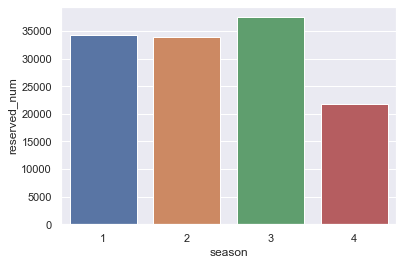

In [38]:
group_season = new_merged.groupby(['season'])['reserved_num'].sum().reset_index()
ax = sns.barplot(x = group_season['season'], y = group_season['reserved_num'])
ax.set(xlabel='season', ylabel='reserved_num')
plt.show()

계절간 예약자 수가 큰 차이 없는 것으로 보인다. 다만 겨울인 4 범위에서 예약자 수가 가장 없다는 것을 알 수 있다.

#### avg_temp 범주화

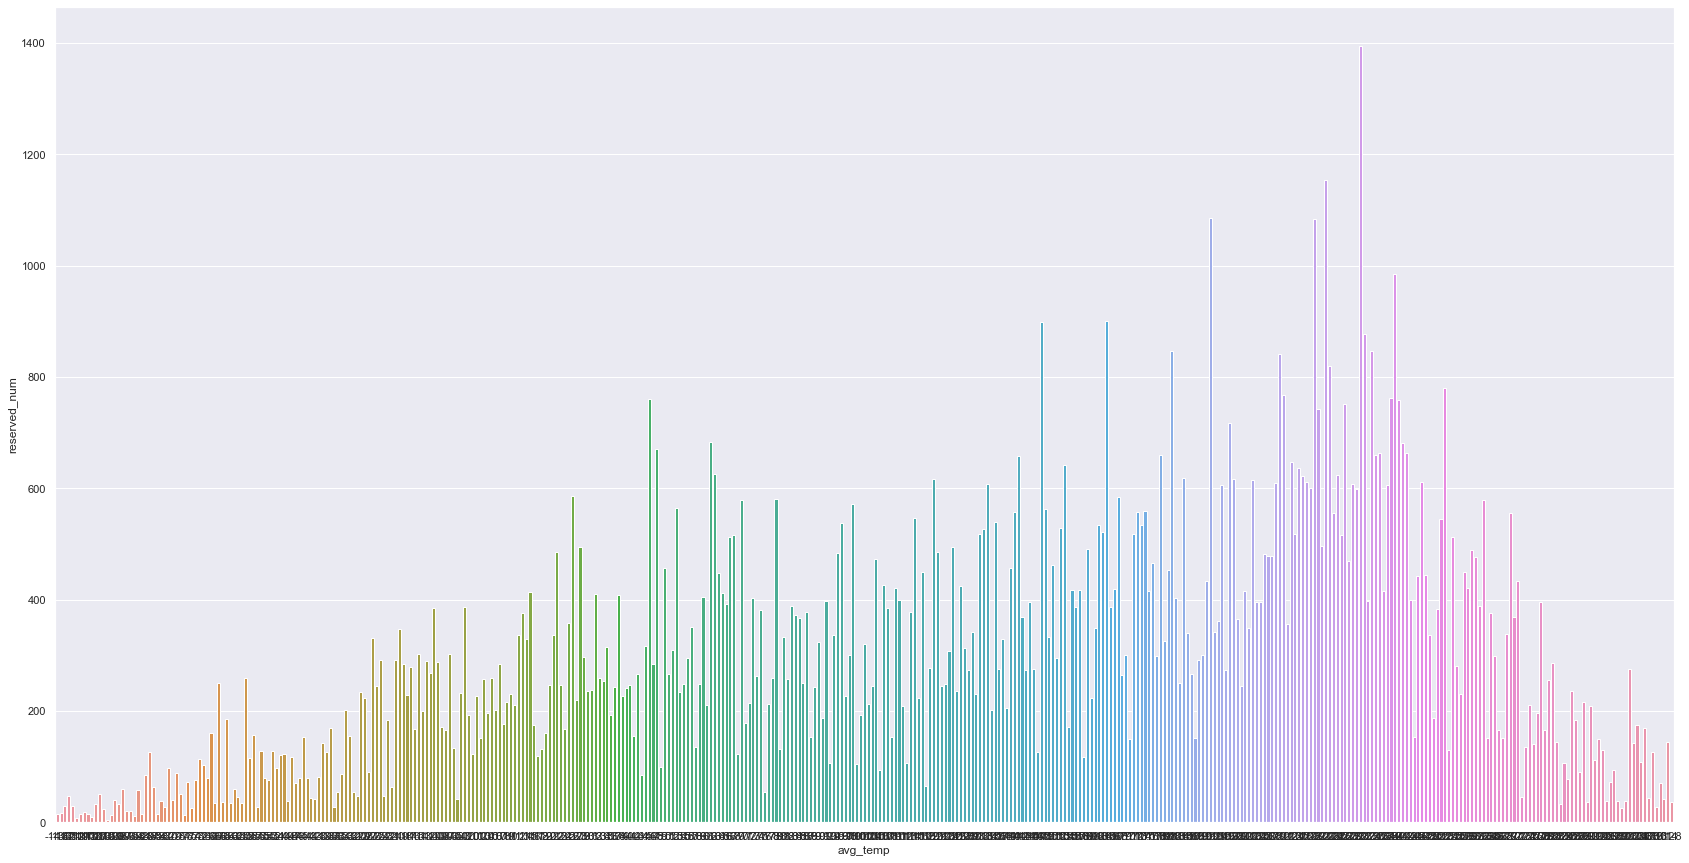

In [39]:
plt.figure(figsize=(29,15))
group_season = new_merged.groupby(['avg_temp'])['reserved_num'].sum().reset_index()
ax = sns.barplot(x = group_season['avg_temp'], y = group_season['reserved_num'])
ax.set(xlabel='avg_temp', ylabel='reserved_num')
plt.show()

In [40]:
new_merged["avg_temp"].max()

31.8

In [41]:
new_merged["avg_temp"].min()

-14.6

In [42]:
def func(x):
    if (x <= -5):
        return 0
    elif (x > -5) and (x <= 0):
        return 1
    elif (x > 0) and (x <= 5):
        return 2
    elif (x > 5) and (x <= 10):
        return 3
    elif (x > 10) and (x <= 15):
        return 4
    elif (x > 15) and (x <= 20):
        return 5
    elif (x > 20) and (x <= 25):
        return 6
    elif (x > 25) and (x <= 30):
        return 7
    else:
        return 8 

In [43]:
new_merged['temp'] = new_merged['avg_temp'].apply(lambda x : func(x))

In [44]:
new_merged.head()

,date,reserved_num,avg_temp,daily_prec,avg_wind,latest_snow,most_snow,year,month,day,season,temp
0,2010-10-27,4,6.2,0.0,2.1,0.0,0.0,2010,10,27,3,3
1,2010-10-28,2,7.9,0.0,2.8,0.0,0.0,2010,10,28,3,3
2,2010-10-29,3,10.4,0.0,2.7,0.0,0.0,2010,10,29,3,4
3,2010-10-30,2,12.0,0.0,2.2,0.0,0.0,2010,10,30,3,4
4,2010-11-01,1,11.9,0.0,4.3,0.0,0.0,2010,11,1,3,4


#### 범주화된 temp 별 예약자수 시각화

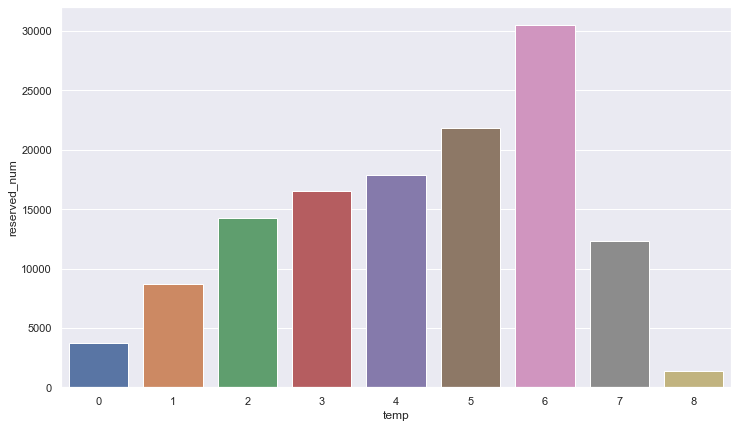

In [45]:
plt.figure(figsize=(12,7))
group_season = new_merged.groupby(['temp'])['reserved_num'].sum().reset_index()
ax = sns.barplot(x = group_season['temp'], y = group_season['reserved_num'])
ax.set(xlabel='temp', ylabel='reserved_num')
plt.show()

온도별 예약자 수는 큰 차이를 보인다. 온도가 30도 초과일 때에는 예약자 수가 가장 적었다는 것을 알 수 있다. 그리고 온도가 -5도 이하일 때에도 예약자 수가 적었다. 이는 기온이 예약자 수에 영향을 줌을 의미한다고 생각한다.

#### avg_wind 범주화

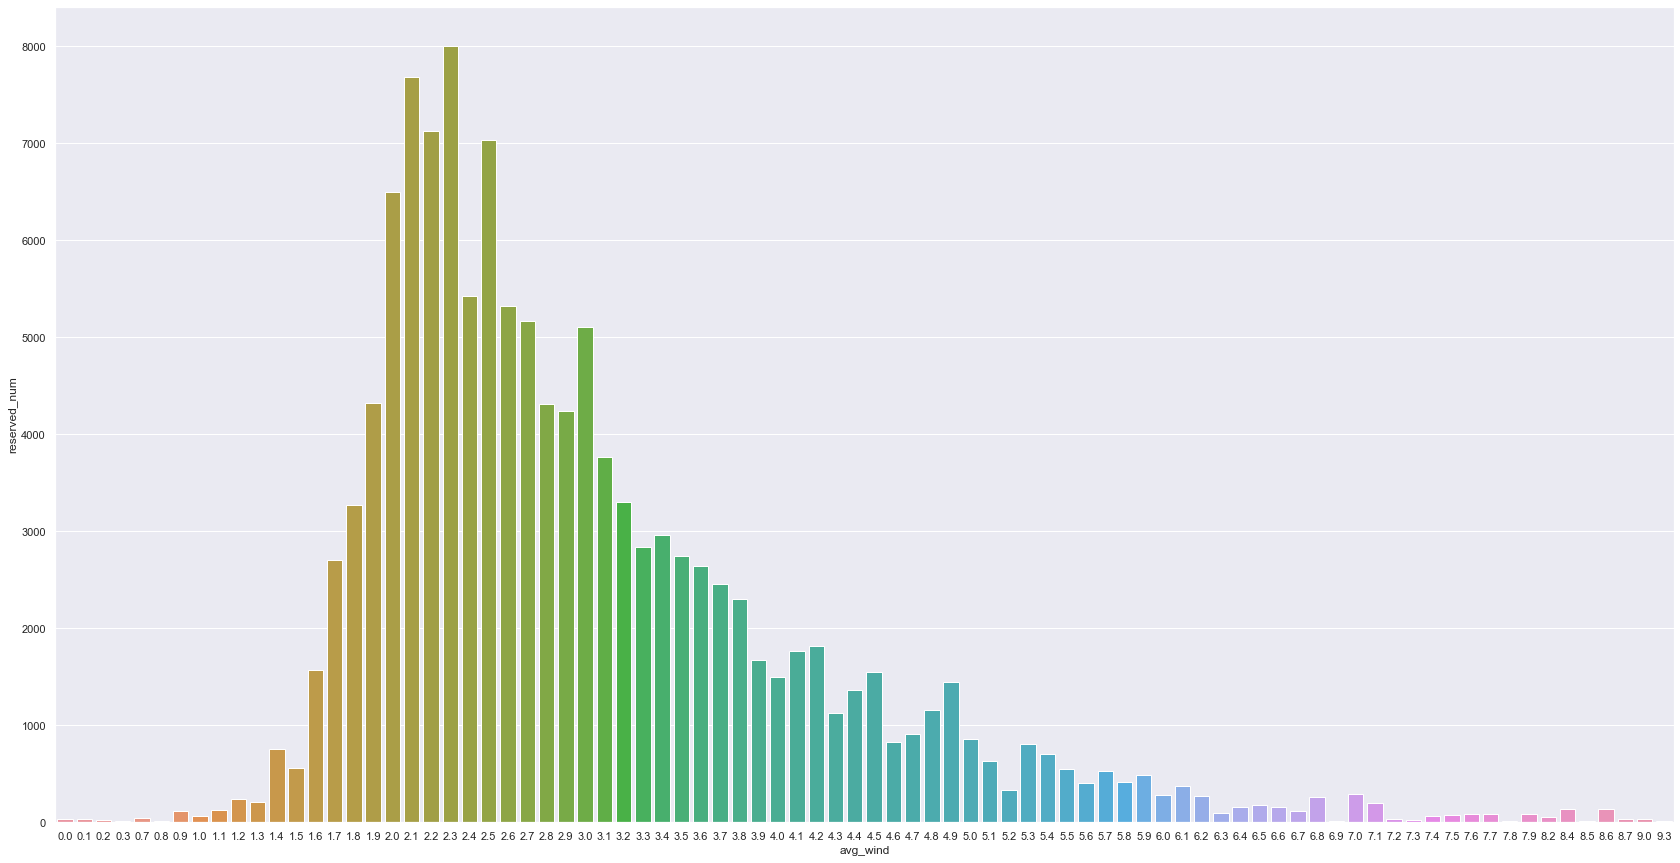

In [46]:
plt.figure(figsize=(29,15))
group_season = new_merged.groupby(['avg_wind'])['reserved_num'].sum().reset_index()
ax = sns.barplot(x = group_season['avg_wind'], y = group_season['reserved_num'])
ax.set(xlabel='avg_wind', ylabel='reserved_num')
plt.show()

In [47]:
new_merged["avg_wind"].max()

9.3

In [48]:
new_merged["avg_wind"].min()

0.0

In [49]:
def func(x):
    if (x <= 0.0):
        return 0
    elif (x > 0.0) and (x <= 2):
        return 1
    elif (x > 2) and (x <= 4):
        return 2
    elif (x > 4) and (x <= 6):
        return 3
    elif (x > 6) and (x <= 8):
        return 4
    else:
        return 5

In [50]:
new_merged['wind'] = new_merged['avg_wind'].apply(lambda x : func(x))

#### 범주화된 wind 별 예약자수 시각화

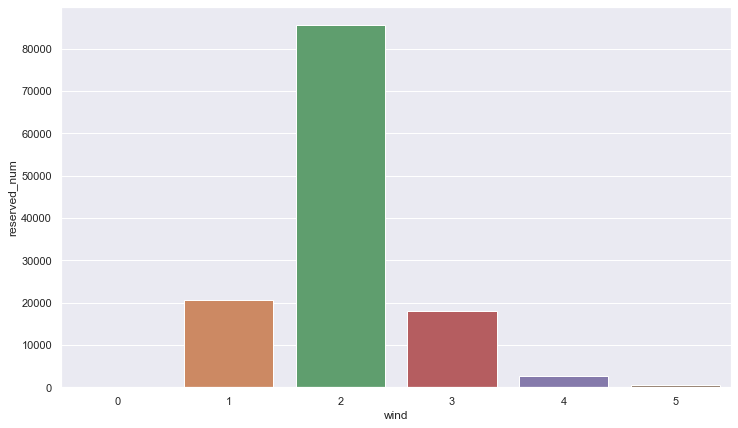

In [51]:
plt.figure(figsize=(12,7))
group_season = new_merged.groupby(['wind'])['reserved_num'].sum().reset_index()
ax = sns.barplot(x = group_season['wind'], y = group_season['reserved_num'])
ax.set(xlabel='wind', ylabel='reserved_num')
plt.show()

풍속에 따라서도 예약자 수가 큰 차이를 보였다. 바람이 가장 많이 부는 범위에서 예약자 수가 급격히 감소하였다. 이를 통해 풍속도 예약에 영향을 준다고 생각된다.

#### 이상치

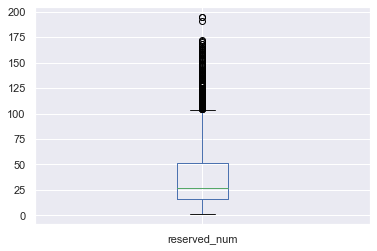

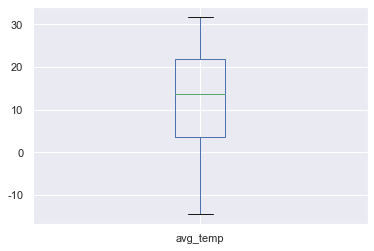

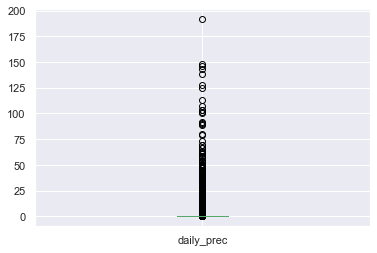

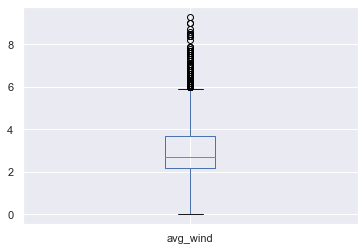

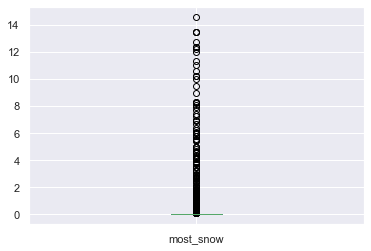

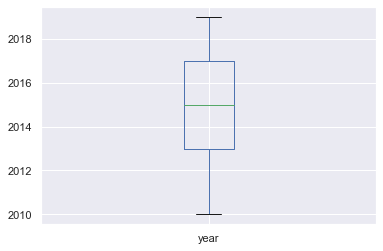

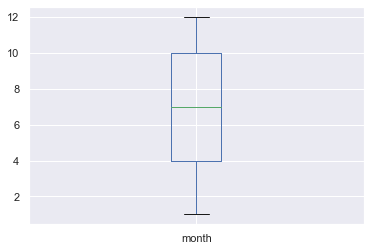

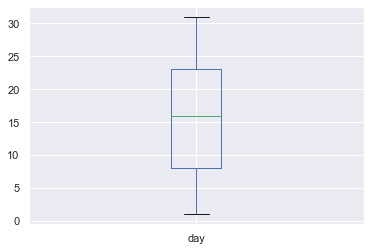

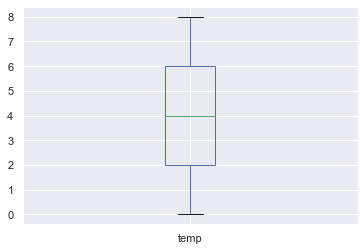

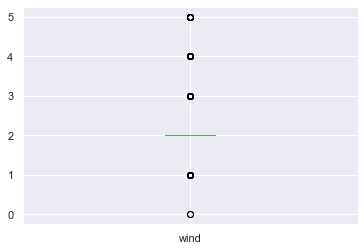

In [52]:
new_merged.plot(kind = 'box', y = 'reserved_num')
new_merged.plot(kind = 'box', y = 'avg_temp')
new_merged.plot(kind = 'box', y = 'daily_prec')
new_merged.plot(kind = 'box', y = 'avg_wind')
new_merged.plot(kind = 'box', y = 'most_snow')
new_merged.plot(kind = 'box', y = 'year')
new_merged.plot(kind = 'box', y = 'month')
new_merged.plot(kind = 'box', y = 'day')
new_merged.plot(kind = 'box', y = 'temp')
new_merged.plot(kind = 'box', y = 'wind')

### (3) Modification

### - 정규성

#### 히스토그램

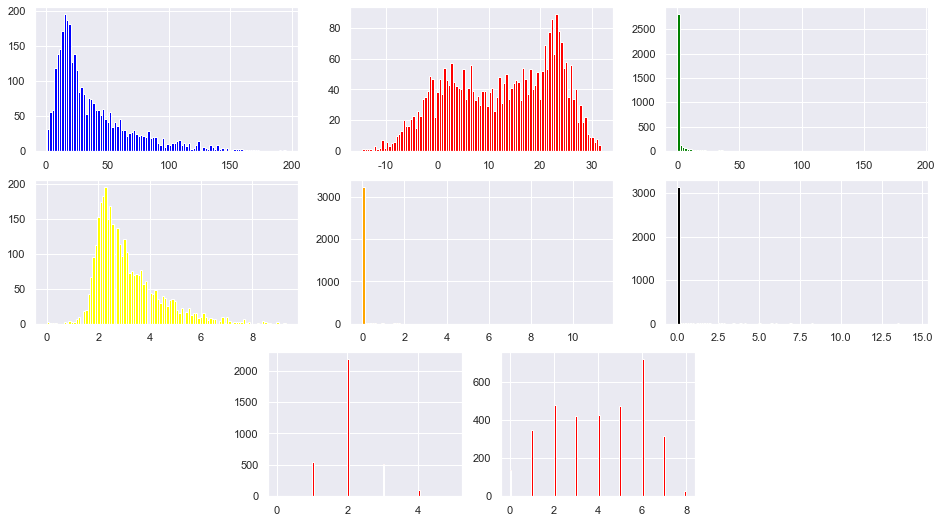

In [53]:
f, a = plt.subplots(3, 4, figsize=(16, 9))

plt.subplot(3, 3, 1)
plt.hist(new_merged['reserved_num'], color='blue', bins=100)
plt.subplot(3, 3, 2)
plt.hist(new_merged['avg_temp'], color='red', bins=100)
plt.subplot(3, 3, 3)
plt.hist(new_merged['daily_prec'], color='green', bins=100)
plt.subplot(3, 3, 4)
plt.hist(new_merged['avg_wind'], color='yellow', bins=100)
plt.subplot(3, 3, 5)
plt.hist(new_merged['latest_snow'], color='orange', bins=100)
plt.subplot(3, 3, 6)
plt.hist(new_merged['most_snow'], color='black', bins=100)
plt.subplot(3, 3, 7)
plt.hist(new_merged['year'], color='white', bins=100)
plt.subplot(3, 3, 8)
plt.hist(new_merged['month'], color='blue', bins=100)
plt.subplot(3, 3, 9)
plt.hist(new_merged['day'], color='red', bins=100)
plt.subplot(3, 4, 10)
plt.hist(new_merged['wind'], color='red', bins=100)
plt.subplot(3, 4, 11)
plt.hist(new_merged['temp'], color='red', bins=100)

plt.show()

#### Skewness

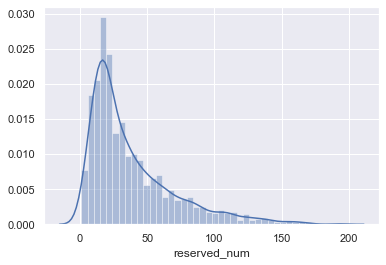

In [54]:
sns.distplot(new_merged['reserved_num'])

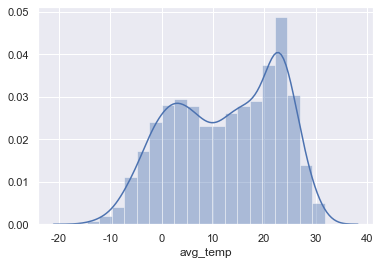

In [55]:
sns.distplot(new_merged['avg_temp'])

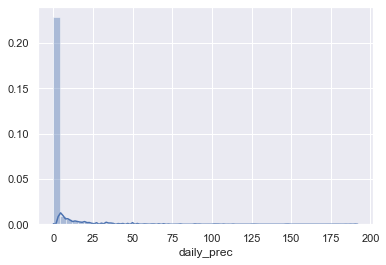

In [56]:
sns.distplot(new_merged['daily_prec'])

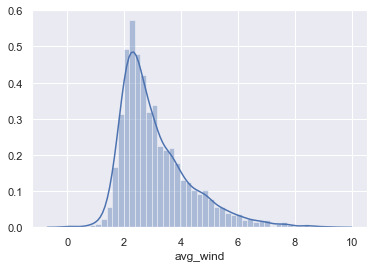

In [57]:
sns.distplot(new_merged['avg_wind'])

In [58]:
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from scipy.stats import norm, skew

In [59]:
# get the numeric values
numeric_features = new_merged.dtypes[new_merged.dtypes != "object"].index
numeric_features

Index(['reserved_num', 'avg_temp', 'daily_prec', 'avg_wind', 'latest_snow',
       'most_snow', 'year', 'month', 'day', 'season', 'temp', 'wind'],
      dtype='object')

In [60]:
# check the skew of all numerical features
skewed_feats = new_merged[numeric_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSekw in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness


Sekw in numerical features: 



,Skew
latest_snow,11.865511
most_snow,7.901223
daily_prec,7.473625
reserved_num,1.569700
avg_wind,1.360955
wind,0.750264
day,0.004046
season,-0.014596
year,-0.020669
month,-0.032070


In [61]:
skewness = skewness[abs(skewness)>0.7]
skewness

,Skew
latest_snow,11.865511
most_snow,7.901223
daily_prec,7.473625
reserved_num,1.569700
avg_wind,1.360955
wind,0.750264
day,NaN
season,NaN
year,NaN
month,NaN


In [62]:
new_merged['reserved_num' ] = np.log1p(new_merged['reserved_num'])
new_merged['latest_snow' ] = np.log1p(new_merged['latest_snow'])
new_merged['daily_prec' ] = np.log1p(new_merged['daily_prec'])
new_merged['most_snow' ] = np.log1p(new_merged['most_snow'])
new_merged['avg_wind' ] = np.log1p(new_merged['avg_wind'])
new_merged['wind' ] = np.log1p(new_merged['wind'])

In [63]:
# get the numeric values
numeric_features = new_merged.dtypes[new_merged.dtypes != "object"].index
numeric_features

Index(['reserved_num', 'avg_temp', 'daily_prec', 'avg_wind', 'latest_snow',
       'most_snow', 'year', 'month', 'day', 'season', 'temp', 'wind'],
      dtype='object')

In [64]:
# check the skew of all numerical features
skewed_feats = new_merged[numeric_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSekw in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness


Sekw in numerical features: 



,Skew
latest_snow,8.119152
most_snow,5.340061
daily_prec,2.400788
avg_wind,0.470868
day,0.004046
season,-0.014596
year,-0.020669
month,-0.032070
wind,-0.189724
reserved_num,-0.198790


### - 상관계수

In [65]:
cols = ["reserved_num", "avg_temp", "daily_prec", 
        "avg_wind", "latest_snow", "most_snow", 
        "year", "month", "day", "season", "temp", "wind"]
corr = new_merged[cols].corr(method = 'pearson')
print(corr)

              reserved_num  avg_temp  daily_prec  avg_wind  latest_snow  \
reserved_num      1.000000  0.238420    0.026958 -0.073405    -0.071061   
avg_temp          0.238420  1.000000    0.173616 -0.321317    -0.202079   
daily_prec        0.026958  0.173616    1.000000  0.169222     0.123442   
avg_wind         -0.073405 -0.321317    0.169222  1.000000     0.079069   
latest_snow      -0.071061 -0.202079    0.123442  0.079069     1.000000   
most_snow        -0.136071 -0.335625    0.032198  0.095726     0.629670   
year              0.458341  0.061140   -0.023131 -0.018999    -0.046602   
month             0.055717  0.252346    0.071312 -0.079783    -0.003483   
day               0.016015  0.001003    0.001891 -0.026297     0.010128   
season           -0.215469 -0.498993   -0.094094  0.046526     0.176247   
temp              0.233957  0.990160    0.168452 -0.315616    -0.198411   
wind             -0.051188 -0.249043    0.131902  0.864018     0.055752   

              most_snow 

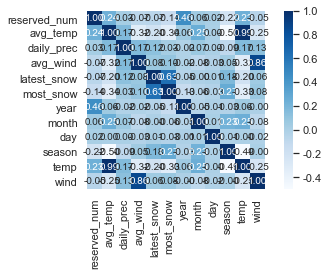

In [66]:
sns.set(font_scale = 1.0)
hm = sns.heatmap(corr.values,
                cbar = True,
                annot = True,
                square = True,
                fmt = '.2f',
                annot_kws = {'size' : 10},
                yticklabels = cols,
                xticklabels = cols,
                cmap='Blues')
plt.tight_layout()
plt.show()

latest_snow와 most_snow 간의 상관관계가 약간 있다고 보여진다.

### - P-value & VIF

In [67]:
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [68]:
new_merged.columns

Index(['date', 'reserved_num', 'avg_temp', 'daily_prec', 'avg_wind',
       'latest_snow', 'most_snow', 'year', 'month', 'day', 'season', 'temp',
       'wind'],
      dtype='object')

In [69]:
features = "avg_temp+daily_prec+avg_wind+latest_snow+most_snow+year+month+day+season+temp+wind"

In [70]:
# Break into left and right hand side; y and X
y, X = dmatrices("reserved_num ~" + features, data=new_merged, return_type="dataframe")

# For each Xi, calculate VIF
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Fit X to y
result = sm.OLS(y, X).fit()

In [71]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           reserved_num   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     114.3
Date:                Mon, 14 Jun 2021   Prob (F-statistic):          3.36e-222
Time:                        19:54:58   Log-Likelihood:                -3515.1
No. Observations:                3345   AIC:                             7054.
Df Residuals:                    3333   BIC:                             7128.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -276.8245      9.259    -29.897      

p-value가 most_snow보다 latest_snow가 더 높으므로, latest_snow 변수를 삭제해준다.

In [72]:
features = "avg_temp+daily_prec+avg_wind+most_snow+year+month+day+season+temp+wind"

In [73]:
# Break into left and right hand side; y and X
y, X = dmatrices("reserved_num ~" + features, data=new_merged, return_type="dataframe")

# For each Xi, calculate VIF
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Fit X to y
result = sm.OLS(y, X).fit()

In [74]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [75]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           reserved_num   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     125.8
Date:                Mon, 14 Jun 2021   Prob (F-statistic):          3.06e-223
Time:                        19:55:11   Log-Likelihood:                -3515.1
No. Observations:                3345   AIC:                             7052.
Df Residuals:                    3334   BIC:                             7120.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -276.6832      9.247    -29.922      0.0

In [76]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [77]:
vif.round(1)

,VIF Factor,features
0,595172.8,Intercept
1,53.0,avg_temp
2,1.1,daily_prec
3,4.3,avg_wind
4,1.2,most_snow
5,1.0,year
6,1.3,month
7,1.0,day
8,1.7,season
9,51.3,temp


In [78]:
features = "daily_prec+avg_wind+avg_temp+most_snow+year+month+day+season+wind"

In [79]:
# Break into left and right hand side; y and X
y, X = dmatrices("reserved_num ~" + features, data=new_merged, return_type="dataframe")

# For each Xi, calculate VIF
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Fit X to y
result = sm.OLS(y, X).fit()

In [80]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [81]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [82]:
vif.round(1)

,VIF Factor,features
0,595150.6,Intercept
1,1.1,daily_prec
2,4.3,avg_wind
3,2.0,avg_temp
4,1.2,most_snow
5,1.0,year
6,1.3,month
7,1.0,day
8,1.7,season
9,4.0,wind


### (4) Modeling

In [83]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC, LinearRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer

In [84]:
x = new_merged.drop(['reserved_num', 'date', 'latest_snow', 'temp'], axis=1) # input
y = new_merged['reserved_num'] # target

In [85]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, random_state = 35, test_size = 0.25)

#### RMSLE

In [86]:
from sklearn import metrics
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [87]:
def rmsle(y, y_,convertExp=True):
    if convertExp:
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

##### - Linear Regression

In [88]:
lModel = LinearRegression()

# Train the model
lModel.fit(X = x_train,y = y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [89]:
lModel.fit(x_train,y_train)
lModel_train_pred = lModel.predict(x_train)
lModel_pred = np.expm1(lModel.predict(x_test.values))
print ("RMSLE Value For Linear Regression: ")
print(rmsle(y_train, lModel_train_pred))

RMSLE Value For Linear Regression: 
0.6605722196821997


##### - Lasso Regression

In [90]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=3))

In [92]:
lasso.fit(x_train,y_train)
lasso_train_pred = lasso.predict(x_train)
lasso_pred = np.expm1(lasso.predict(x_test.values))
print ("RMSLE Value For Lasso Regression: ")
print(rmsle(y_train, lasso_train_pred))

RMSLE Value For Lasso Regression: 
0.6605718903377591


##### - Elastic Net Regression

In [93]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [94]:
ENet.fit(x_train,y_train)
ENet_train_pred = ENet.predict(x_train)
ENet_pred = np.expm1(ENet.predict(x_test.values))
print ("RMSLE Value For ENet Regression: ")
print(rmsle(y_train, ENet_train_pred))

RMSLE Value For ENet Regression: 
0.6605711372606896


##### - Kernel Ridge Regression

In [95]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5) #kernel = 'rbf' , 'sigmoid' 

In [96]:
KRR.fit(x_train,y_train)
KRR_train_pred = KRR.predict(x_train)
KRR_pred = np.expm1(KRR.predict(x_test.values))
print ("RMSLE Value For KRR Regression: ")
print(rmsle(y_train, KRR_train_pred))

RMSLE Value For KRR Regression: 
0.6530547949619899


##### - Gradient Boosting Regression

In [97]:
GBoost = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=4,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=15, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=3000,
             presort='auto', random_state=5, subsample=1.0, verbose=0,
             warm_start=False)

In [98]:
GBoost.fit(x_train,y_train)
GBoost_train_pred = GBoost.predict(x_train)
GBoost_pred = np.expm1(GBoost.predict(x_test.values))
print ("RMSLE Value For GBoost Regression: ")
print(rmsle(y_train, GBoost_train_pred))

C:\Users\adore\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1342: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter. We also recommend using HistGradientBoosting models instead.
  FutureWarning)


RMSLE Value For GBoost Regression: 
0.3803124264352948


##### - XGBoost

In [99]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [100]:
model_xgb.fit(x_train, y_train)
xgb_train_pred = model_xgb.predict(x_train)
xgb_pred = np.expm1(model_xgb.predict(x_test))
print(rmsle(y_train, xgb_train_pred))

[19:56:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0.4465600158143453


##### - LightGBM

In [101]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [102]:
model_lgb.fit(x_train, y_train)
lgb_train_pred = model_lgb.predict(x_train)
lgb_pred = np.expm1(model_lgb.predict(x_test.values))
print(rmsle(y_train, lgb_train_pred))

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
0.5566957570005849


##### - Random Forest Regressor

In [103]:
regr = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=60, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [104]:
regr.fit(x_train, y_train)
regr_train_pred = regr.predict(x_train)
regr_pred = np.expm1(regr.predict(x_test.values))
print(rmsle(y_train, regr_train_pred))

0.2406247347827159


#### 앙상블

In [105]:
ensemble = xgb_pred*0.45 + GBoost_pred*0.35 + regr_pred*0.2
ensemble

array([43.29383011, 39.50821266, 36.26701996, 28.06455729, 21.30113846,
       41.96704143, 24.06288774, 23.77498958, 39.42446434, 27.4396198 ,
       24.9726503 , 27.23353031, 16.69925458, 26.26384865, 30.81044865,
       50.89356676, 22.21621062, 34.21953755, 46.81579639, 44.25362737,
       24.08685962, 27.38775015, 19.3937789 , 26.60424464, 26.80798609,
       34.96321054, 24.40551534, 41.95669019, 47.46103758, 11.6755954 ,
       19.67337576, 28.78728921, 26.57533776, 32.04893897, 37.42117874,
       29.19191656, 40.42322032, 33.31512956, 18.07238428, 50.48749496,
       36.4486815 , 23.73949365, 22.71307715, 13.78195338, 18.34293125,
       64.42202727, 22.39052823, 39.50591465,  9.55668044,  7.32407102,
       12.62348655,  3.28147313, 18.604906  , 12.81833157, 26.9501148 ,
       27.48259684, 24.18521143, 49.08909088, 26.65782838,  3.68645445,
       15.59448679, 60.59584659, 24.43764678, 86.06294324, 43.86067584,
       19.18963616, 60.26613527, 43.02820713, 24.08318503, 31.89